In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1640, 0.5557, 0.7527],
        [0.3813, 0.4253, 0.3515],
        [0.5229, 0.7961, 0.3355],
        [0.6658, 0.6958, 0.8748],
        [0.8279, 0.2898, 0.0199]])


In [3]:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
##https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [29]:
training_data[0][0].shape, training_data[0][1]

(torch.Size([1, 28, 28]), 9)

In [31]:
labels_map[9]

'Ankle Boot'

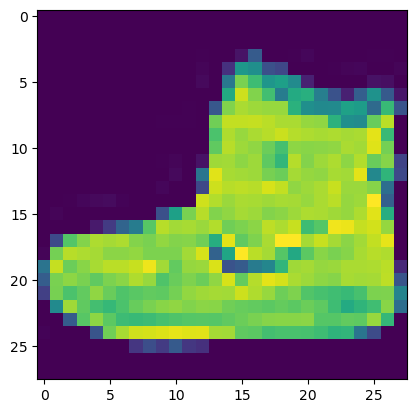

In [30]:
plt.imshow(training_data[0][0][0])

In [25]:
dir(training_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

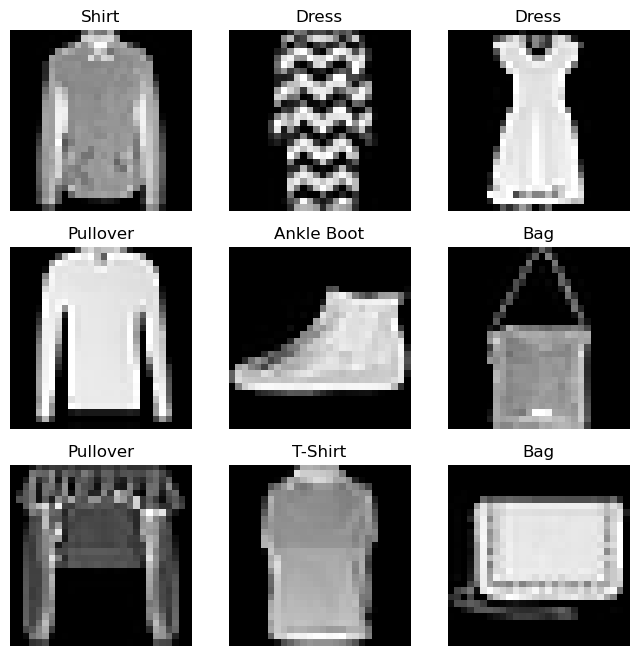

In [5]:
labels_map= {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


figure = plt.figure(figsize=(8,8))
cols,rows = 3,3


for i in range(1, cols*rows +1) :
    sample_idx = torch.randint(len (training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot (rows,cols,i)
    plt.title (labels_map[label])
    plt.axis("off")
    plt.imshow (img.squeeze(), cmap="gray")

plt.show()






    

In [53]:
import os
import pandas as pd
from torchvision.io import read_image



class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform


In [54]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


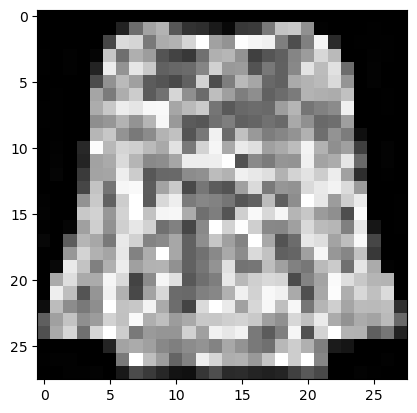

Label: 6


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [9]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [11]:
if torch.backends.mps.is_available():
    print("MPS backend is available.")
else:
    print("MPS backend is not available. Using CPU instead.")

MPS backend is available.


In [12]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    x = torch.ones(5, device=mps_device)
    # Or
    x = torch.ones(5, device="mps")

    # Any operation happens on the GPU
    y = x * 2

    # Move your model to mps just like any other device
    model = YourFavoriteNet()
    model.to(mps_device)

    # Now every call runs on the GPU
    pred = model(x)


NameError: name 'YourFavoriteNet' is not defined

In [13]:
import torch

print(torch.backends.mps.is_available())  # True dönmeli
print(torch.backends.mps.is_built())      # True dönmeli

True
True


In [14]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [16]:
model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [17]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='mps:0')


In [18]:
input_image = torch.rand(3,28,28)
print(input_image.size())


torch.Size([3, 28, 28])


In [19]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


In [20]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [21]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3950, -0.2586,  0.3244,  0.0920, -0.1427,  0.0970, -0.4093,  0.1040,
         -0.1017,  0.0529,  0.2147, -0.2741,  0.0705, -0.1276, -0.7268,  0.0958,
          0.3056, -0.3234,  0.1830,  0.3280],
        [ 0.4736, -0.3034,  0.1638,  0.0594, -0.1869, -0.1707, -0.2874,  0.1521,
          0.0485, -0.4867, -0.3502, -0.1106, -0.1422,  0.1387, -0.7730,  0.1684,
          0.3366, -0.1165, -0.0539,  0.5214],
        [ 0.6663, -0.3245,  0.0155,  0.1565, -0.1821,  0.0920, -0.2937, -0.0967,
         -0.0389, -0.5715, -0.2849, -0.2294,  0.2060, -0.0061, -0.5767, -0.0042,
          0.5825, -0.4875,  0.0252,  0.7925]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3950, 0.0000, 0.3244, 0.0920, 0.0000, 0.0970, 0.0000, 0.1040, 0.0000,
         0.0529, 0.2147, 0.0000, 0.0705, 0.0000, 0.0000, 0.0958, 0.3056, 0.0000,
         0.1830, 0.3280],
        [0.4736, 0.0000, 0.1638, 0.0594, 0.0000, 0.0000, 0.0000, 0.1521, 0.0485,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1387, 0.00

In [22]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [23]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


In [24]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0292,  0.0319, -0.0346,  ...,  0.0099,  0.0150,  0.0162],
        [ 0.0108,  0.0339, -0.0125,  ..., -0.0077, -0.0219,  0.0331]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0229, -0.0044], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0385,  0.0034,  0.0351,  ...,  0.0396, -0.0400,  0.0399],
        [ 0.0005,  0.0082, -0.0113,  ..., -0.0384, -0.0316, -0.0389]],
       device='mps:0', grad_fn=<Slice

In [35]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [36]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [37]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.312229  [   64/60000]
loss: 2.299446  [ 6464/60000]
loss: 2.270312  [12864/60000]
loss: 2.258348  [19264/60000]
loss: 2.260484  [25664/60000]
loss: 2.208145  [32064/60000]
loss: 2.228222  [38464/60000]
loss: 2.191280  [44864/60000]
loss: 2.191736  [51264/60000]
loss: 2.161952  [57664/60000]
Test Error: 
 Accuracy: 37.1%, Avg loss: 2.155588 

Epoch 2
-------------------------------
loss: 2.168192  [   64/60000]
loss: 2.160994  [ 6464/60000]
loss: 2.097033  [12864/60000]
loss: 2.120307  [19264/60000]
loss: 2.083601  [25664/60000]
loss: 2.000837  [32064/60000]
loss: 2.048790  [38464/60000]
loss: 1.963017  [44864/60000]
loss: 1.976175  [51264/60000]
loss: 1.915570  [57664/60000]
Test Error: 
 Accuracy: 51.8%, Avg loss: 1.905162 

Epoch 3
-------------------------------
loss: 1.935515  [   64/60000]
loss: 1.908609  [ 6464/60000]
loss: 1.786926  [12864/60000]
loss: 1.842180  [19264/60000]
loss: 1.737694  [25664/60000]
loss: 1.671654  [32064/600

In [39]:
## tek bir veri besleyelim predictionunu alalım görselleyelim doğrumu değilmi, confusion matrisini de alalım.

## Custom dataset yapısısyla verileri okuyup , dataset ve sdataloader oluşturuşup veriyi eğitip görselle

Predicted class: Coat, Actual class: Shirt


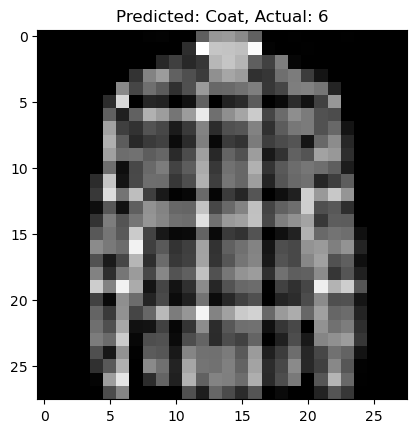

In [52]:
single_image, label = test_data[7]
model.eval()
with torch.no_grad():
    pred = model(single_image.unsqueeze(0))


predicted_class_index = pred.argmax(1).item()

class_names = training_data.classes

predicted_class_name = class_names[predicted_class_index]

actual_class_name = class_names[label]

print(f"Predicted class: {predicted_class_name}, Actual class: {actual_class_name}")

plt.imshow(single_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class_name}, Actual: {label}")
plt.show()

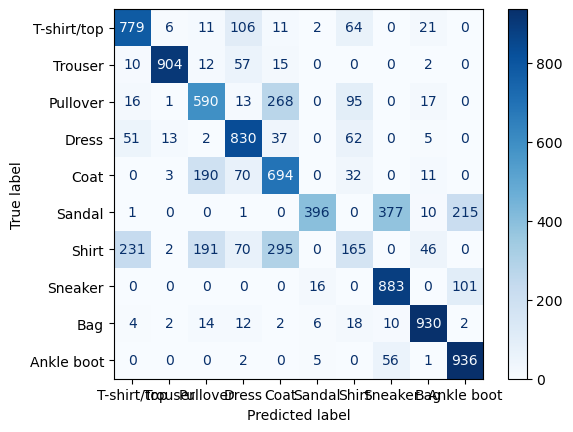

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

with torch.no_grad():
    for X, y in test_dataloader:
        pred = model(X)
        all_preds.extend(pred.argmax(1).tolist())
        all_labels.extend(y.tolist())

cm = confusion_matrix(all_labels, all_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=training_data.classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()